In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel, f_classif
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,1955,0,98178,47.511200,-122.257000,1340,5650
1,6414100192,20141209T000000,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,1951,1991,98125,47.721000,-122.319000,1690,7639
2,5631500400,20150225T000000,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,1933,0,98028,47.737900,-122.233000,2720,8062
3,2487200875,20141209T000000,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,1965,0,98136,47.520800,-122.393000,1360,5000
4,1954400510,20150218T000000,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,1987,0,98074,47.616800,-122.045000,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,3.370842,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312049,367127.196483,0.930062,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,3.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,3.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,4.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Data cleaning and prepartion

#### Finding unique columns

In [7]:
df.shape

(21613, 21)

In [8]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

#### There are total 21613 rows but id column is having only 21436 unique values. There are total of 177 duplicate id values.

In [9]:
df.drop_duplicates(subset = 'id', inplace = True)

#### Droping id variable as it is a column having all unique values

In [10]:
df.drop('id', axis = 1, inplace = True)

#### There are total of three datetime columns: date, yr_built and yr_renovated. Creating some new columns according to the data

In [11]:
df['date'] = df['date'].str[:4].astype(np.int64)
df['Age_of_house'] = df['date'] - df['yr_built']
df['house_renovated'] = np.where(df['yr_renovated'], 1, 0)
df['Age_of_renovation'] = np.where(df['house_renovated'], df['date'] - df['yr_renovated'], df['Age_of_house'])

#### dropping columns date, yr_built and yr_renovated

In [12]:
df.drop(['date','yr_renovated','yr_built'], axis = 1, inplace = True)

In [13]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,house_renovated,Age_of_renovation
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,98178,47.511200,-122.257000,1340,5650,59,0,59
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,98125,47.721000,-122.319000,1690,7639,63,1,23
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,98028,47.737900,-122.233000,2720,8062,82,0,82
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,98136,47.520800,-122.393000,1360,5000,49,0,49
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,98074,47.616800,-122.045000,1800,7503,28,0,28


In [14]:
print("Total columns in the dataframe: ",df.shape[1])

Total columns in the dataframe:  20


In [15]:
discrete_col = [i for i in df.columns if len(df[i].unique())<=30]
continuous_col = [i for i in df.columns if i not in discrete_col]

In [16]:
df[discrete_col].head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,house_renovated
0,3,1.000000,1.000000,0,0,3,7,0
1,3,2.250000,2.000000,0,0,3,7,1
2,2,1.000000,1.000000,0,0,3,6,0
3,4,3.000000,1.000000,0,0,5,7,0
4,3,2.000000,1.000000,0,0,3,8,0


In [17]:
df[continuous_col].head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,Age_of_renovation
0,221900.000000,1180,5650,1180,0,98178,47.511200,-122.257000,1340,5650,59,59
1,538000.000000,2570,7242,2170,400,98125,47.721000,-122.319000,1690,7639,63,23
2,180000.000000,770,10000,770,0,98028,47.737900,-122.233000,2720,8062,82,82
3,604000.000000,1960,5000,1050,910,98136,47.520800,-122.393000,1360,5000,49,49
4,510000.000000,1680,8080,1680,0,98074,47.616800,-122.045000,1800,7503,28,28


In [18]:
df['long'] = np.abs(df['long'])

In [19]:
df[continuous_col].head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,Age_of_renovation
0,221900.000000,1180,5650,1180,0,98178,47.511200,122.257000,1340,5650,59,59
1,538000.000000,2570,7242,2170,400,98125,47.721000,122.319000,1690,7639,63,23
2,180000.000000,770,10000,770,0,98028,47.737900,122.233000,2720,8062,82,82
3,604000.000000,1960,5000,1050,910,98136,47.520800,122.393000,1360,5000,49,49
4,510000.000000,1680,8080,1680,0,98074,47.616800,122.045000,1800,7503,28,28


### Handling Missing values if any.

In [20]:
for i in df.columns:
    if df[i].isnull().sum():
        print(f"column {i} has {df[i].isnull().sum()} missing values.")

#### No missing values were present in the dataframe

### Handling duplicate values if any

In [21]:
print(f"There are total {df.duplicated().sum()} duplicate rows.")

There are total 3 duplicate rows.


In [22]:
df.drop_duplicates(inplace = True)

## Visualiing the data

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


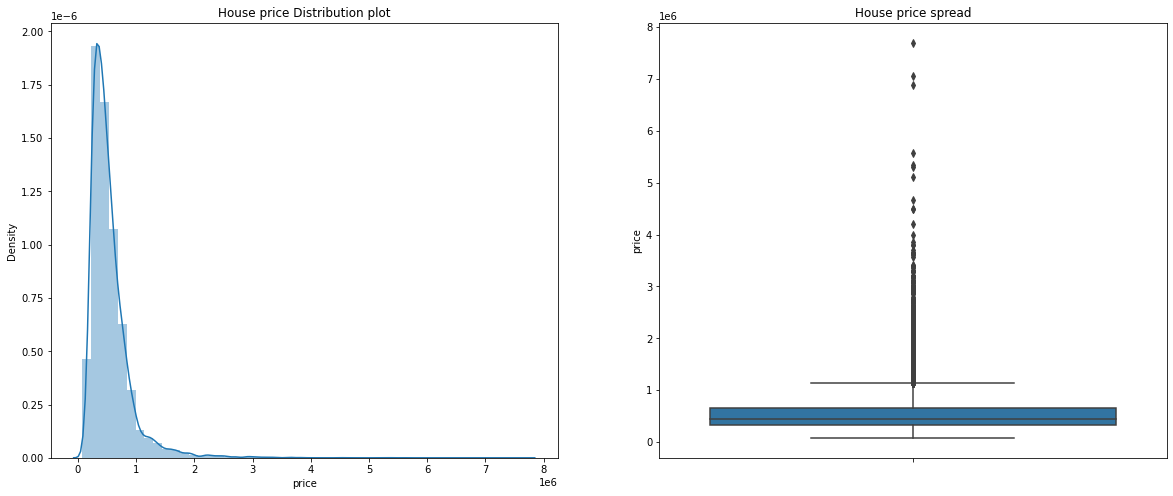

In [23]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('House price Distribution plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('House price spread')
sns.boxplot(y = df.price)

plt.show()

### Distribution of all continuous variable

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


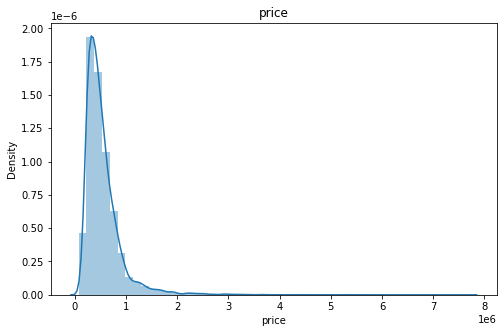

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


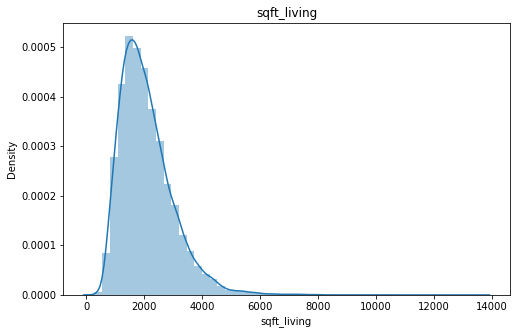

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


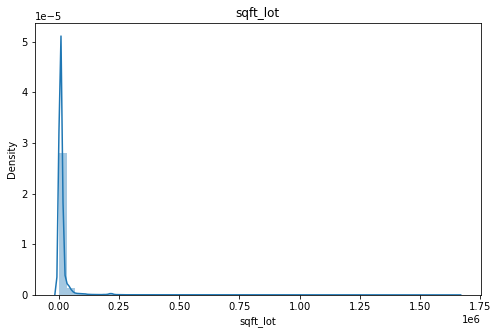

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


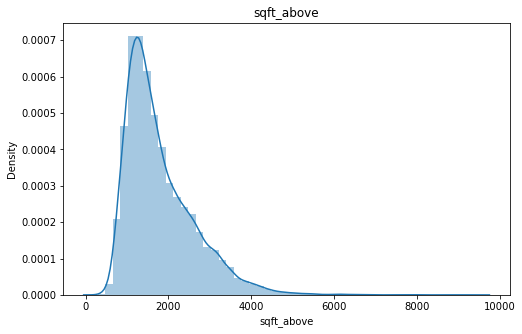

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


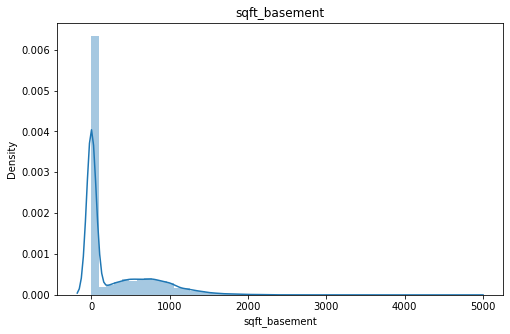

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


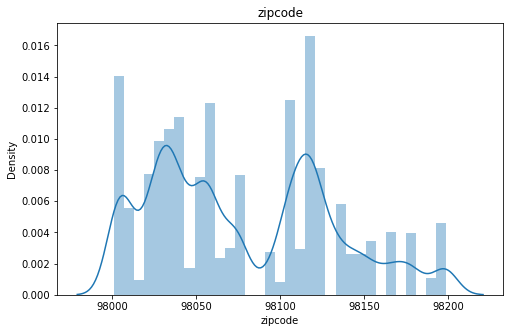

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


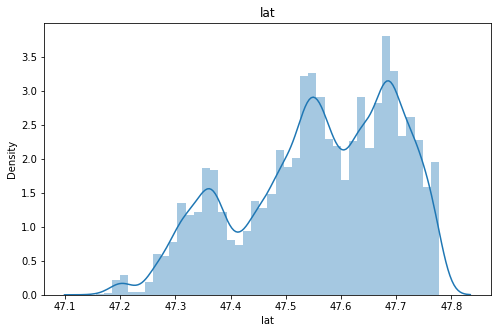

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


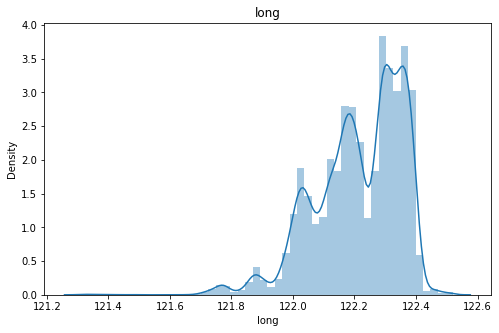

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


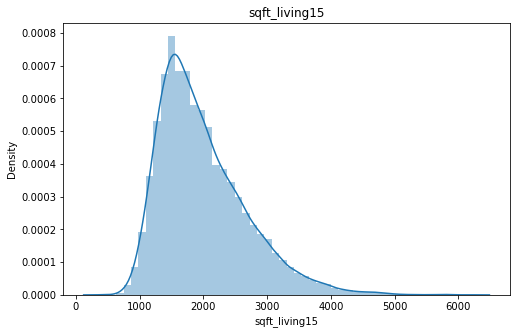

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


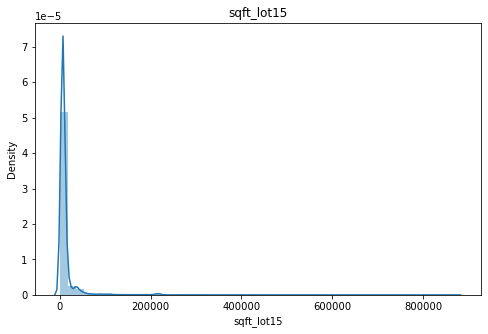

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


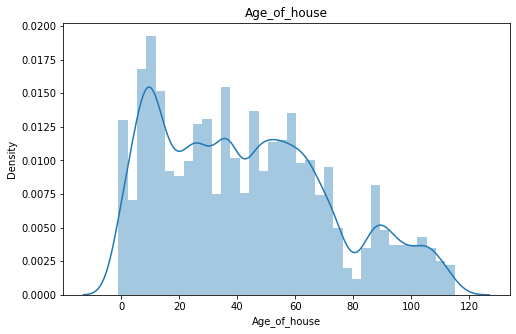

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


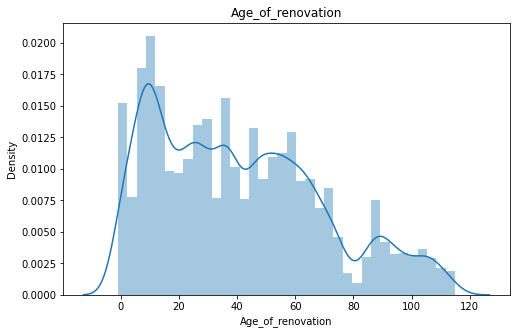

In [24]:
for i in continuous_col:
    plt.figure(figsize = (8,5))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

#### Inference: As we can see here that the most of the data is right skewed.

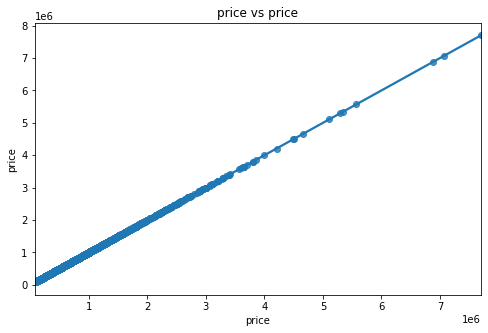

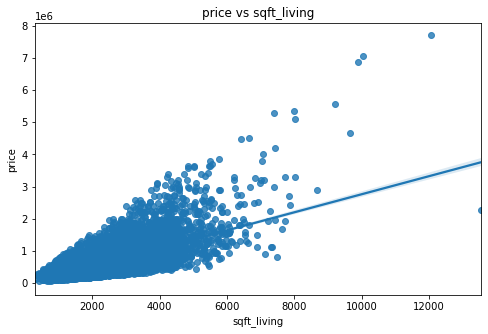

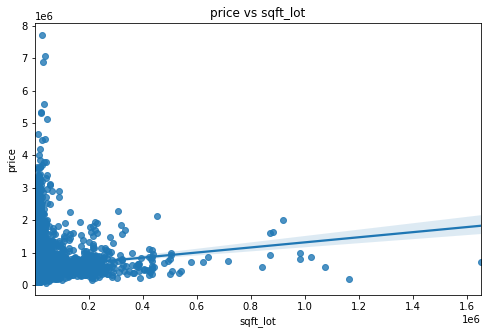

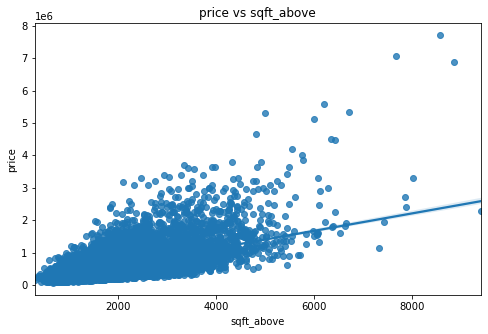

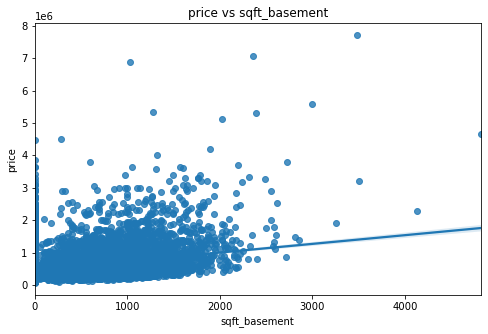

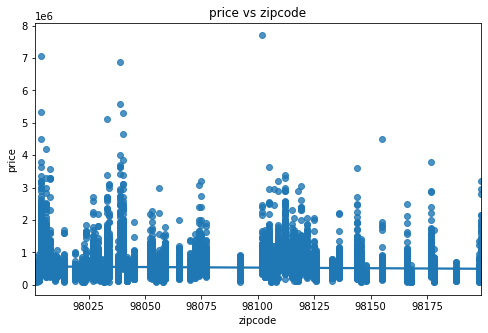

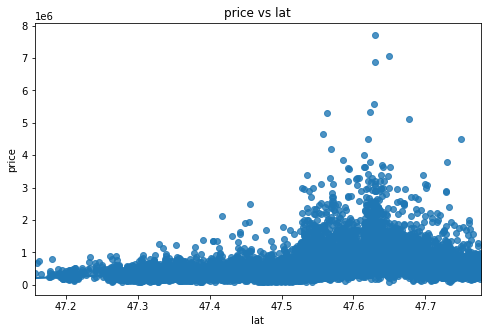

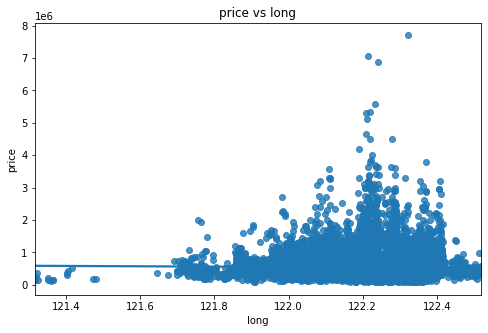

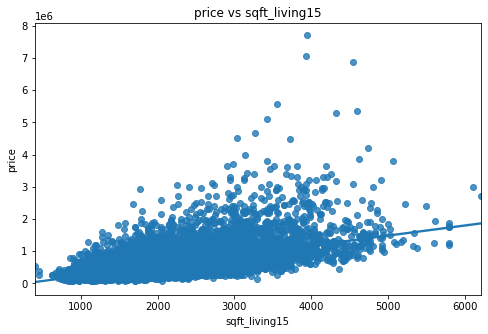

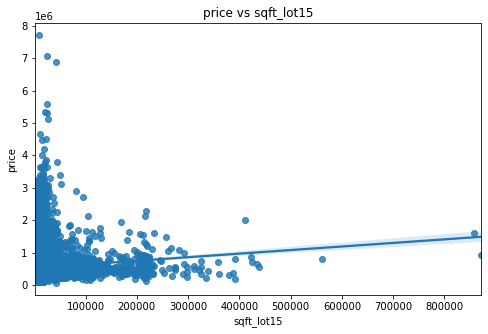

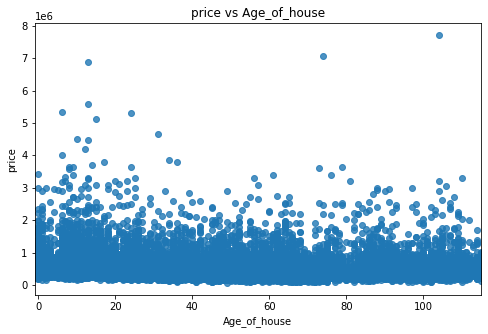

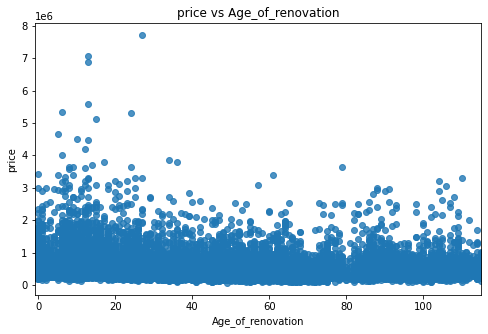

In [25]:
for i in continuous_col:
    plt.figure(figsize = (8,5))
    sns.regplot(x = i, y = 'price', data = df)
    plt.title(f'price vs {i}')
    plt.show()

#### Inference: Some the variables(sqft_living, sqft_above, sqft_living15) are showing postitve correlation towards price variable.

### Scatter plot of log normal values of continuous variables.

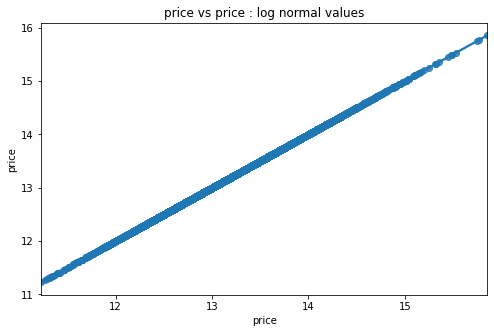

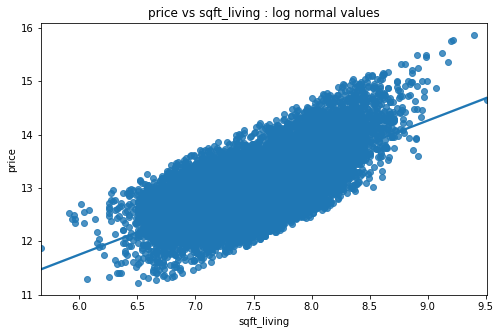

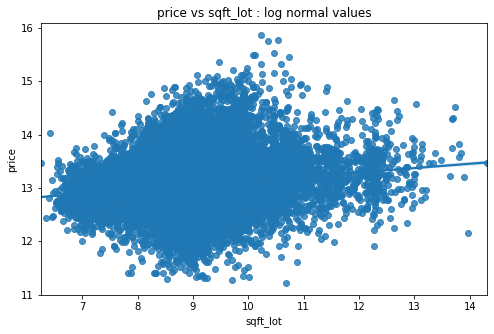

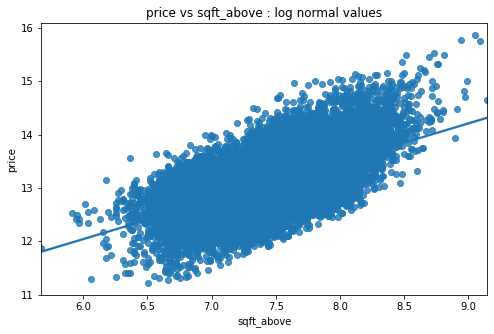

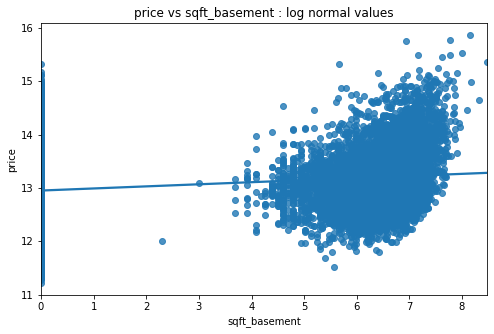

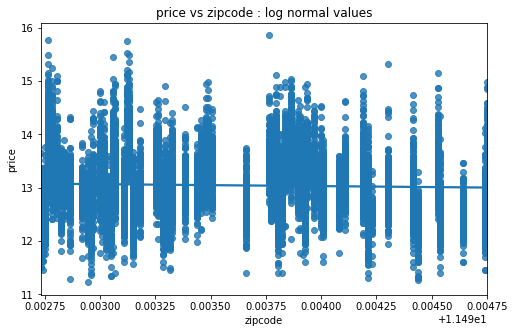

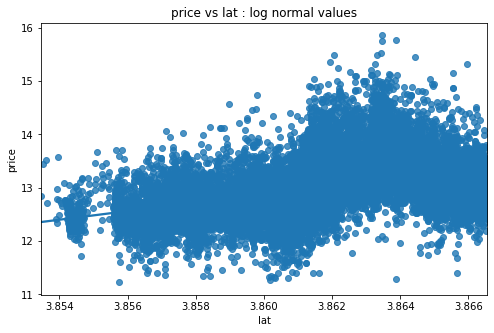

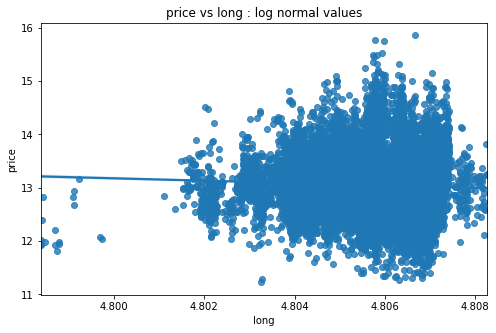

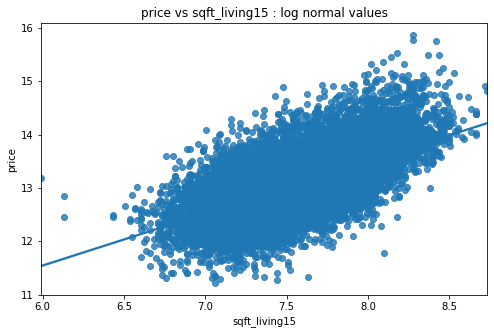

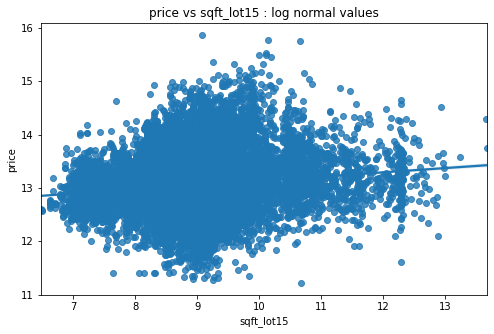

C:\Users\Alpha Wave\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


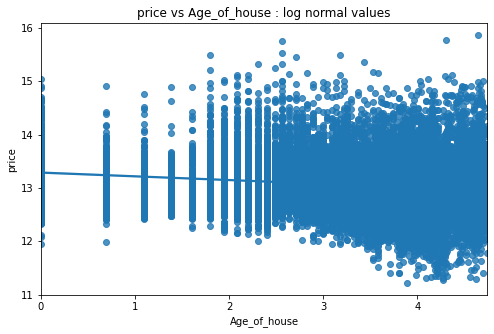

C:\Users\Alpha Wave\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


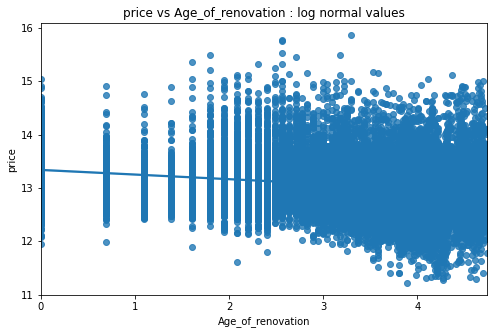

In [26]:
for i in continuous_col:
    data = df.copy()
    plt.figure(figsize = (8,5))
    if 0 in data[i].unique():
        data[i] = data[i].replace({0:1})
        data[i], data['price'] = np.log(data[i]), np.log(data['price'])
        sns.regplot(x = i, y = 'price', data = data)
        plt.title(f'price vs {i} : log normal values')
        plt.show()
        
    else:
        data[i], data['price'] = np.log(data[i]), np.log(data['price'])
        sns.regplot(x = i, y = 'price', data = data)
        plt.title(f'price vs {i} : log normal values')
        plt.show()

### Distribution plot of log normal values of continuous variables.

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


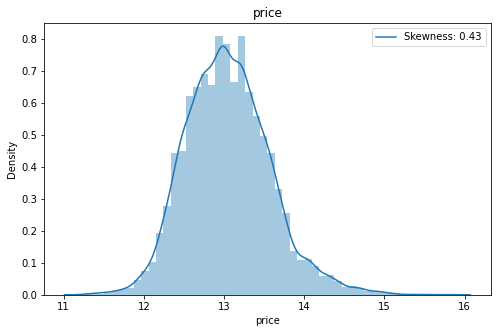

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


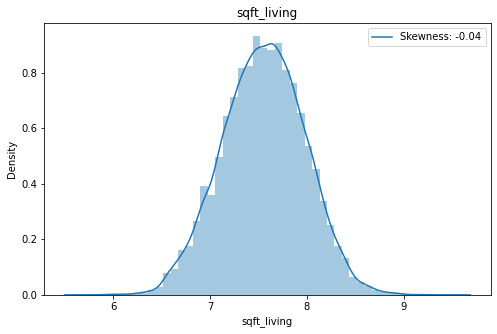

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


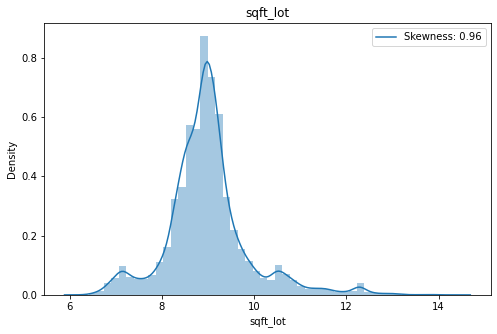

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


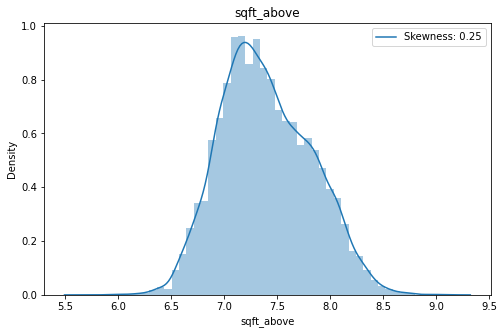

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


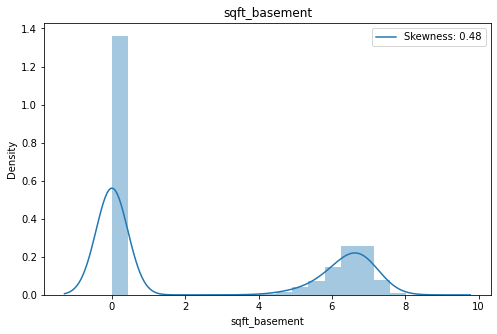

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


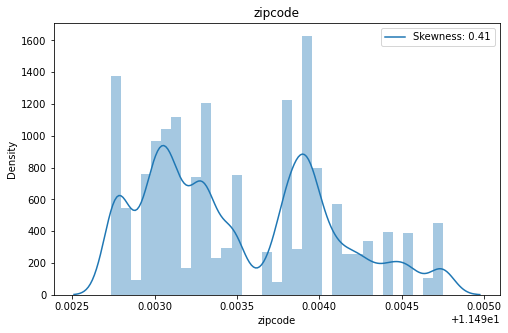

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


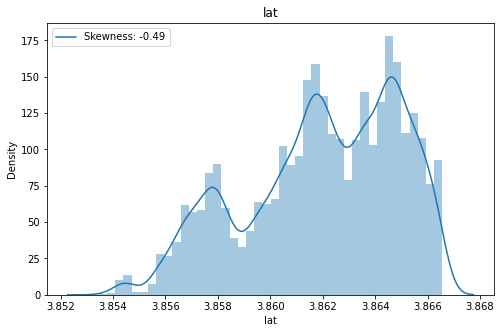

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


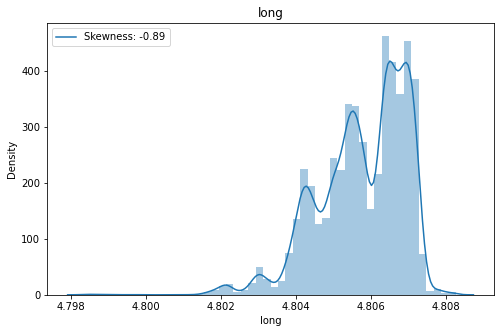

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


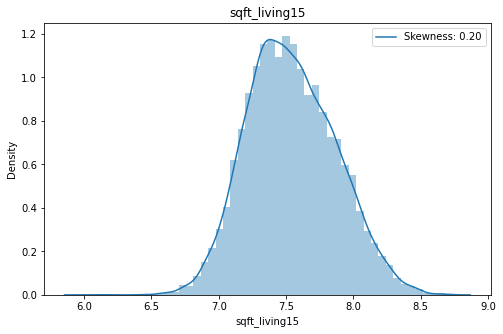

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


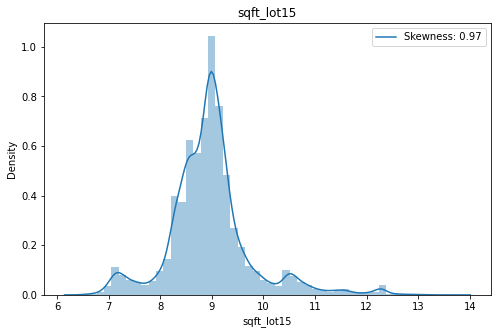

C:\Users\Alpha Wave\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


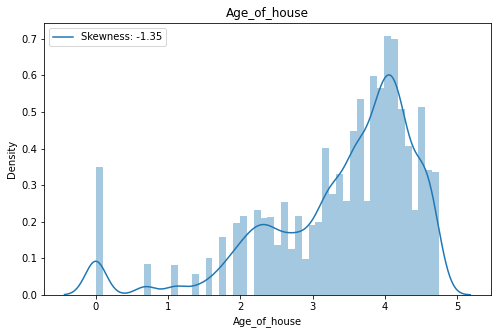

C:\Users\Alpha Wave\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


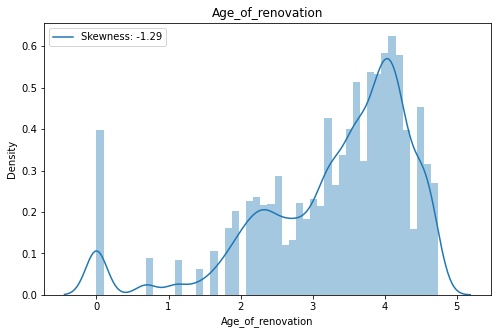

In [27]:
for i in continuous_col:
    data = df.copy()
    if 0 in data[i].unique():
        data[i] = data[i].replace({0:1})
        data[i] = np.log(data[i])
        plt.figure(figsize = (8,5))
        sns.distplot(data[i])
        plt.title(i)
        plt.legend(["Skewness: {:.2f}".format(data[i].skew())])
        plt.show()
    else:
        data[i] = np.log(data[i])
        plt.figure(figsize = (8,5))
        sns.distplot(data[i])
        plt.title(i)
        plt.legend(["Skewness: {:.2f}".format(data[i].skew())])
        plt.show()

#### Inference: Applying log normal on the data did not the make the data to be normally distributed, there are lot of outliers in the data.

In [28]:
data = df.copy()

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,house_renovated,Age_of_renovation
0,221900.000000,3,1.000000,1180,5650,1.000000,0,0,3,7,1180,0,98178,47.511200,122.257000,1340,5650,59,0,59
1,538000.000000,3,2.250000,2570,7242,2.000000,0,0,3,7,2170,400,98125,47.721000,122.319000,1690,7639,63,1,23
2,180000.000000,2,1.000000,770,10000,1.000000,0,0,3,6,770,0,98028,47.737900,122.233000,2720,8062,82,0,82
3,604000.000000,4,3.000000,1960,5000,1.000000,0,0,5,7,1050,910,98136,47.520800,122.393000,1360,5000,49,0,49
4,510000.000000,3,2.000000,1680,8080,1.000000,0,0,3,8,1680,0,98074,47.616800,122.045000,1800,7503,28,0,28


### visualising the discrete data

In [30]:
for i in discrete_col:
    print(i)

bedrooms
bathrooms
floors
waterfront
view
condition
grade
house_renovated


#### total of 8 variables are present

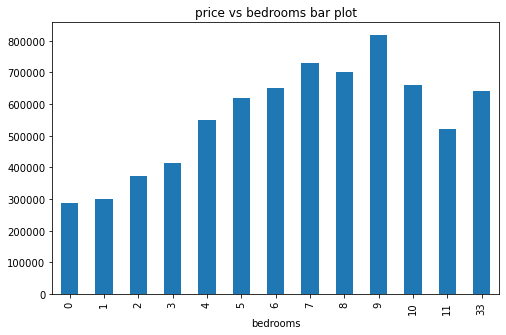

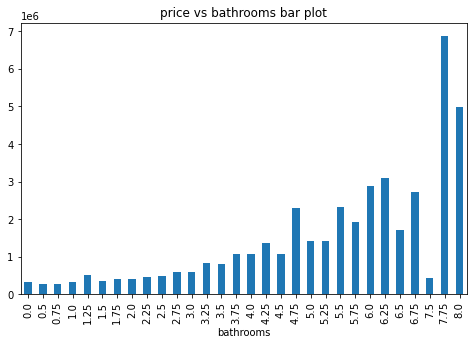

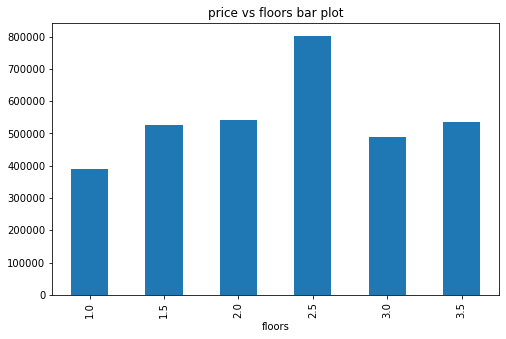

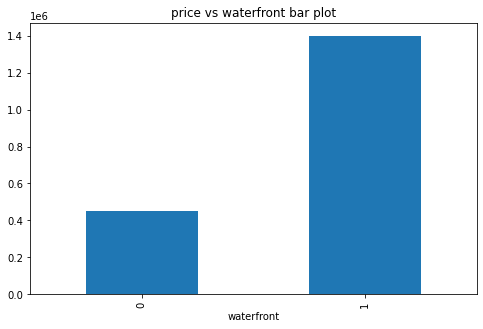

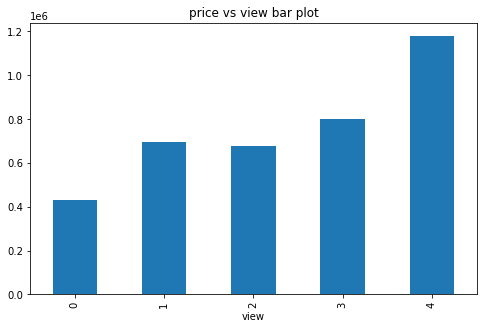

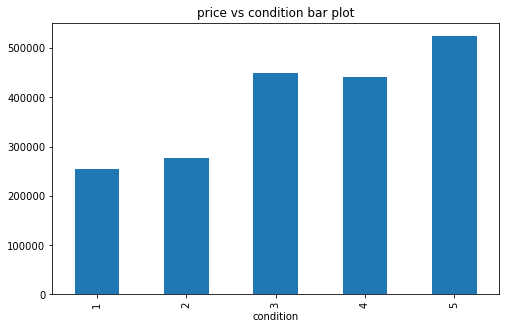

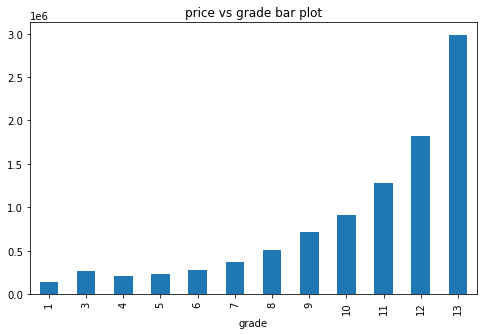

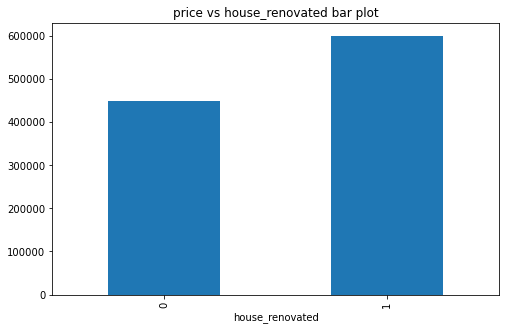

In [31]:
for i in discrete_col:
    plt.figure(figsize = (8,5))
    data.groupby(i)['price'].median().plot.bar()
    plt.title(f'price vs {i} bar plot')
    plt.show()
    

#### Inference: 
#### 1. Price is high if the house is having waterfront.
#### 2. Price is increasing as there is increase in view, condition and grade.
#### 3. Price is high if the house is renovated. 


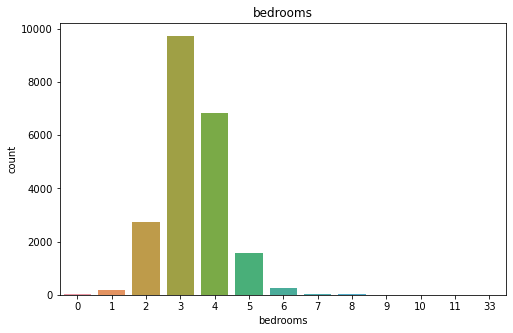

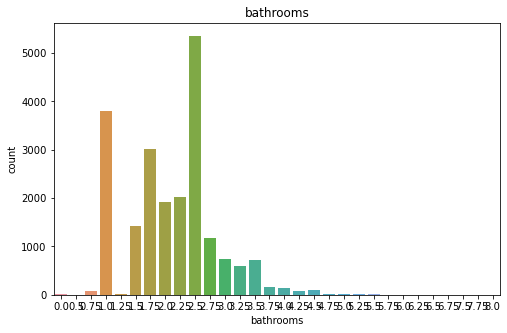

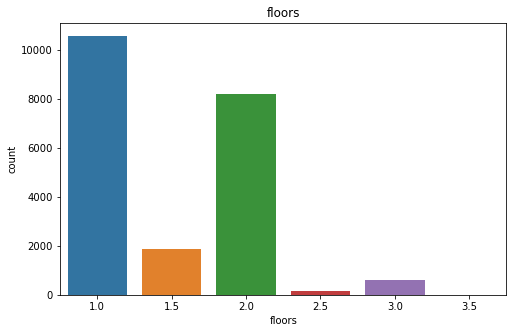

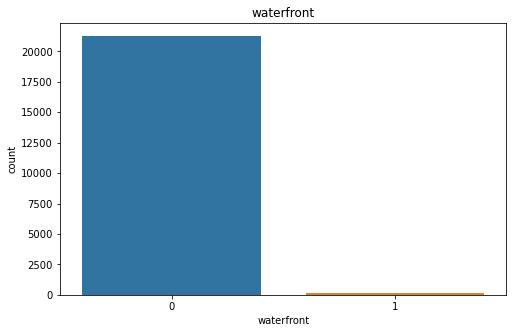

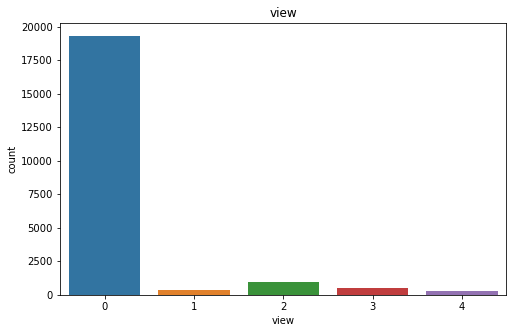

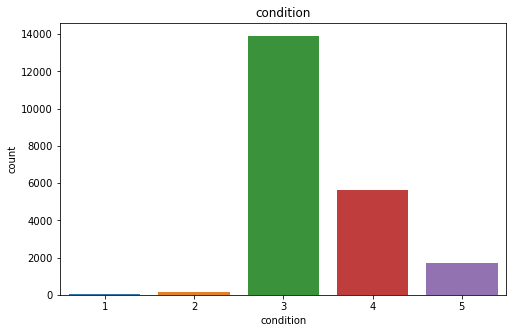

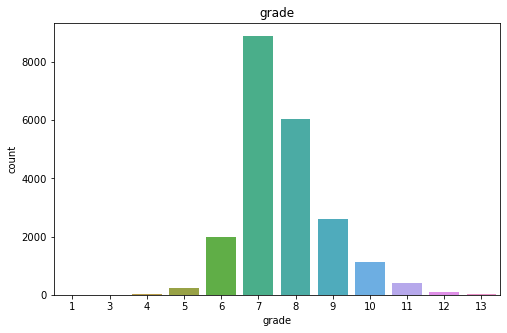

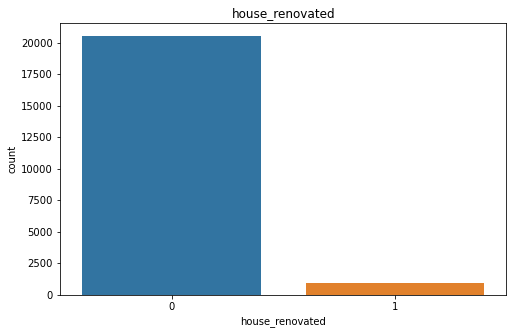

In [32]:
for i in discrete_col:
    plt.figure(figsize = (8,5))
    sns.countplot(x = i, data = data)
    plt.title(i)
    plt.show()

#### Inference:
#### 1. We can see here that house with no waterfront, no view, no renovation are most frequent in the data

### Handling outliers 

In [33]:
for i in ['Age_of_house','Age_of_renovation']:
    data[i].replace(-1,1, inplace = True)

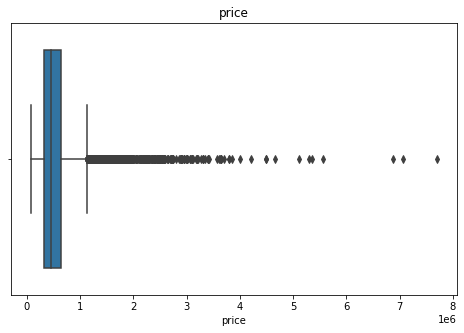

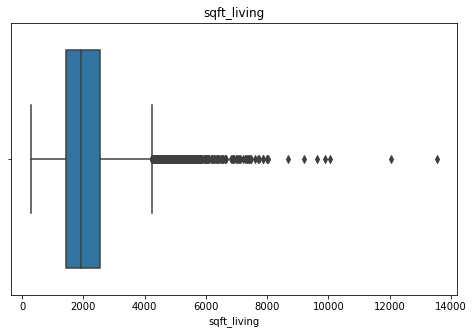

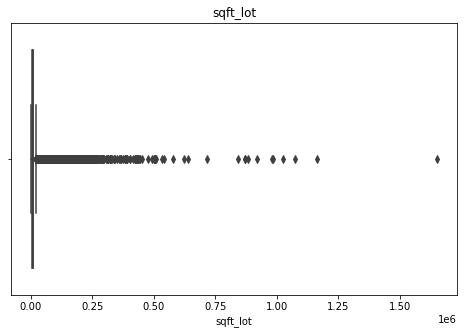

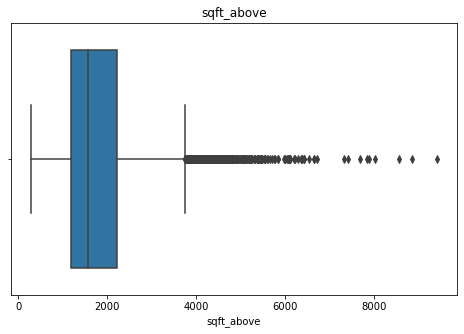

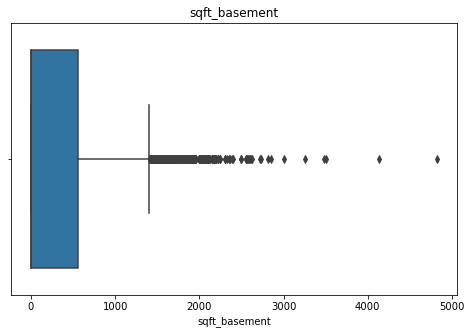

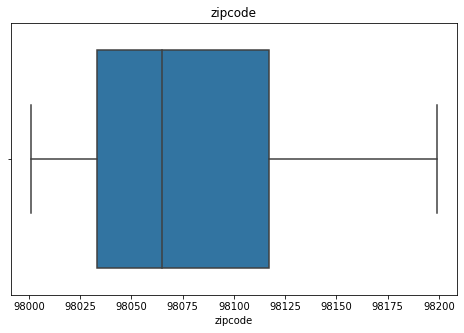

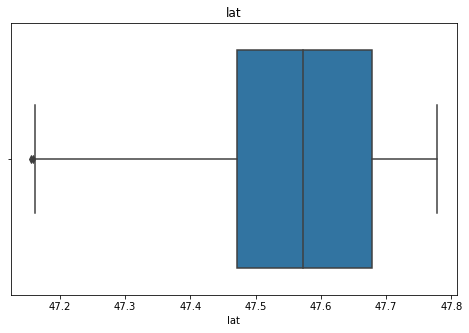

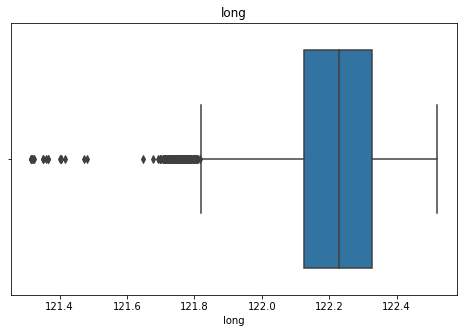

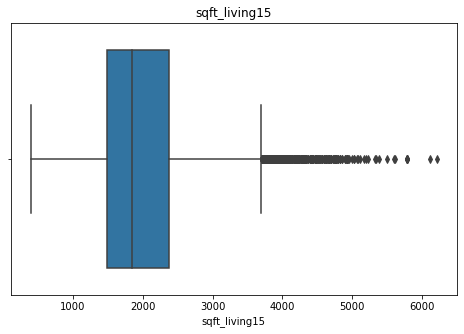

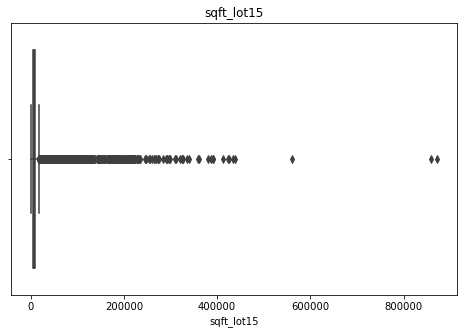

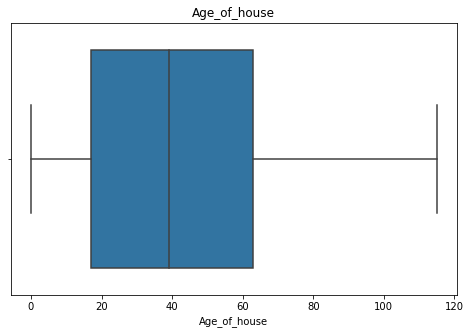

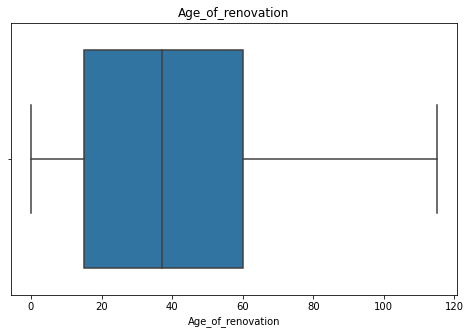

In [34]:
for i in continuous_col:
    plt.figure(figsize = (8,5))
    sns.boxplot(x = i, data = data)
    plt.title(i)
    plt.show()

#### Inference: We can see that there are lot of outliers in the data which will effect the model performance for sure 

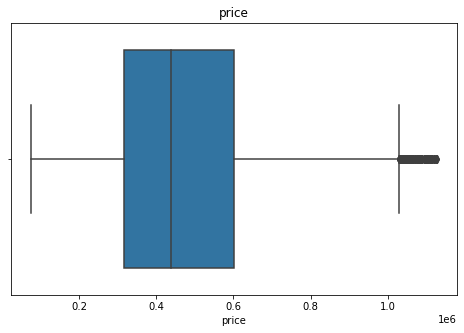

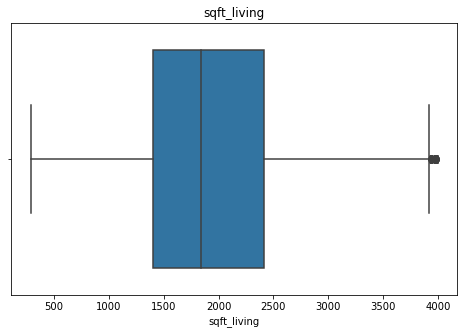

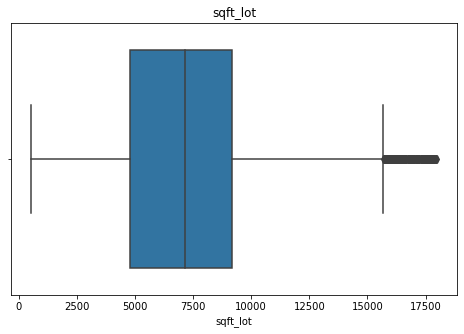

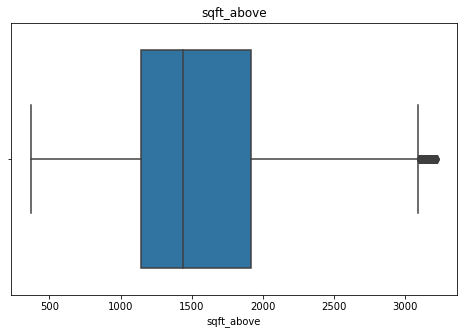

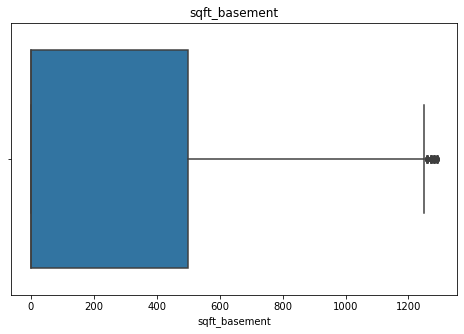

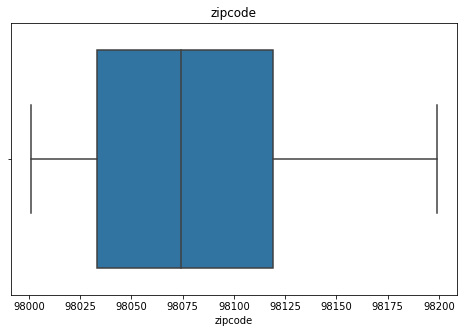

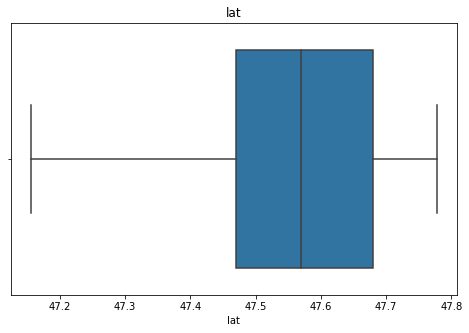

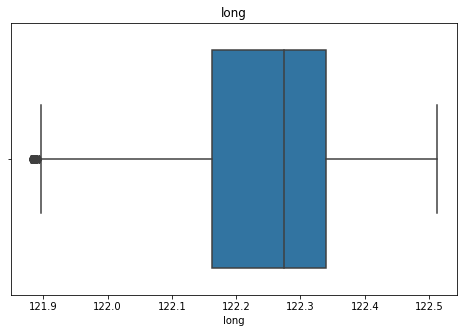

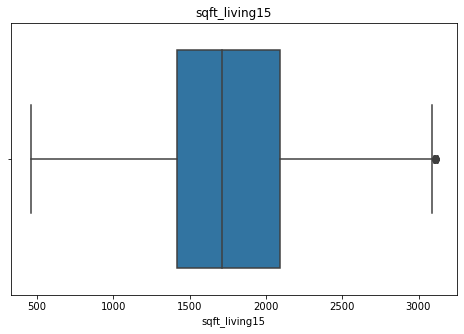

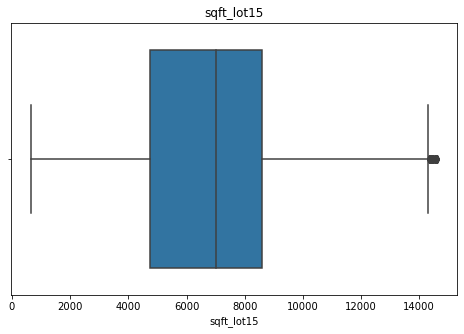

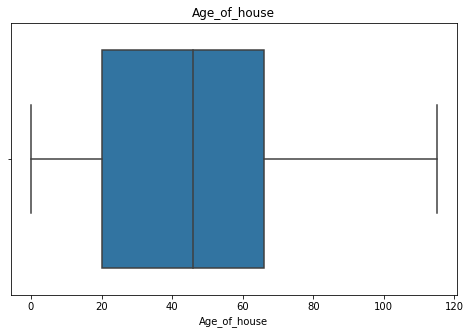

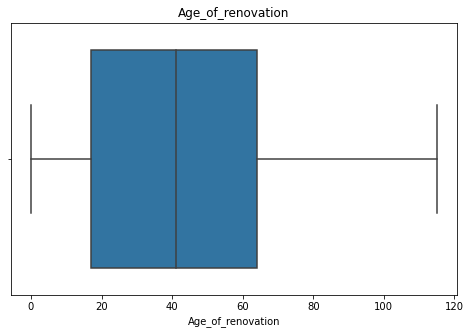

In [35]:
data1 = data.copy()
for i in continuous_col:
    q1, q3 = np.percentile(data1[i],25), np.percentile(data1[i],75)
    iqr = q3 - q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    data1 = data1.query(f'{i}>{lower} and {i}<{upper}')
    plt.figure(figsize = (8,5))
    sns.boxplot(x = i, data = data1)
    plt.title(i)
    plt.show()


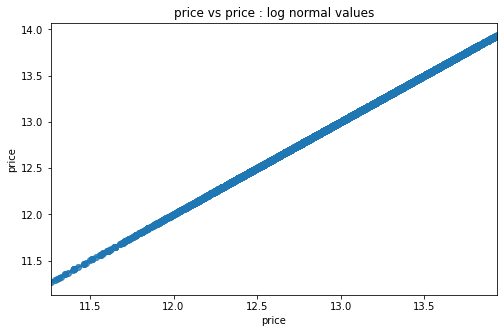

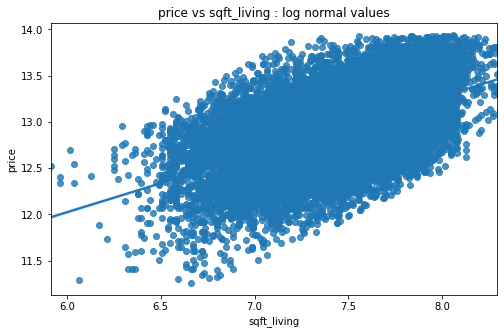

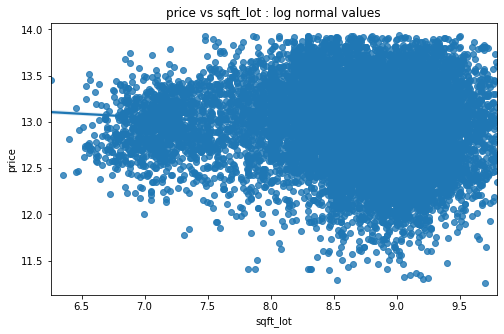

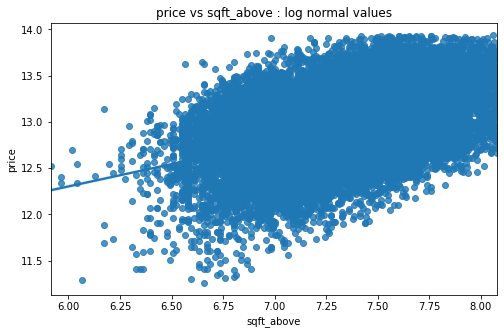

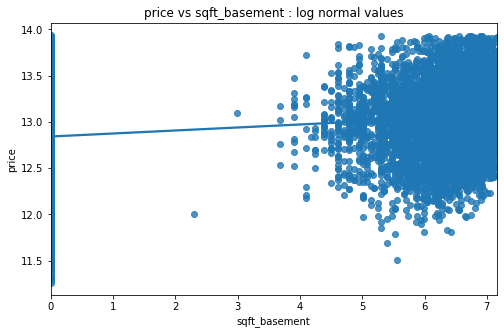

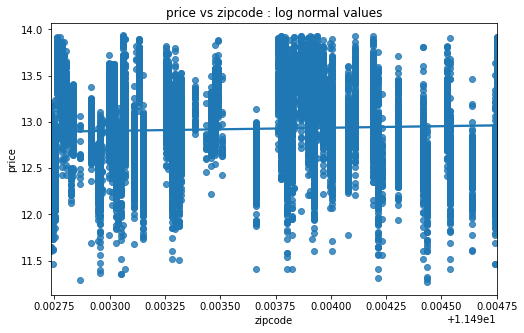

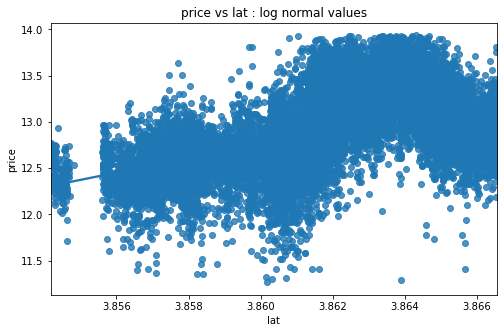

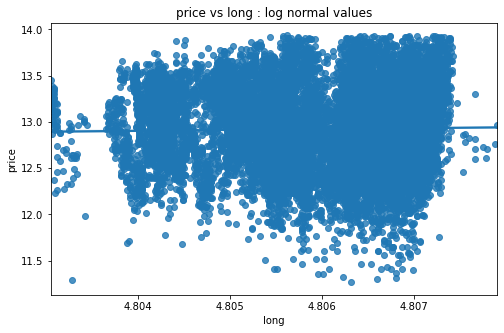

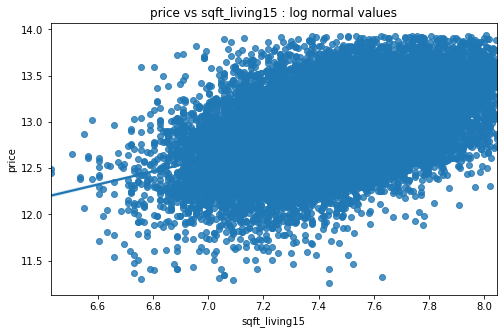

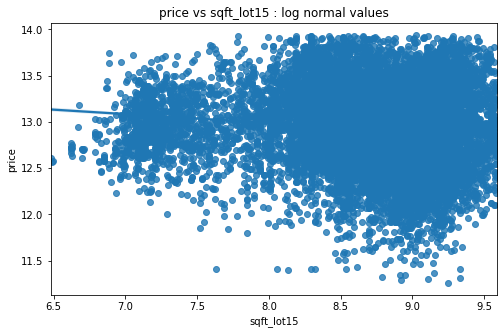

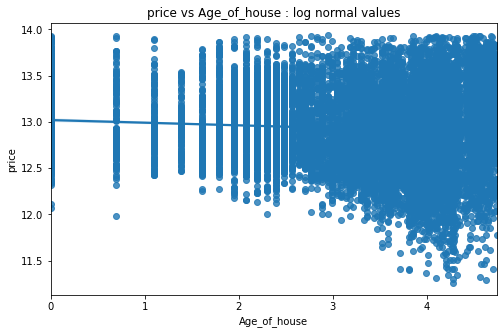

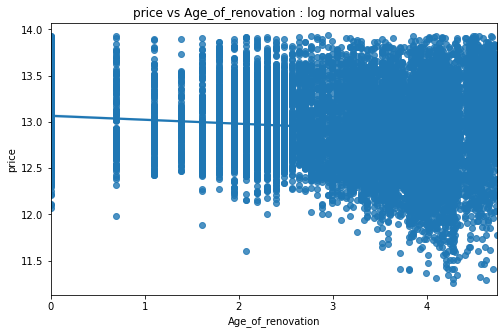

In [36]:
for i in continuous_col:
    data2 = data1.copy()
    plt.figure(figsize = (8,5))
    if 0 in data2[i].unique():
        data2[i] = data2[i].replace({0:1})
        data2[i], data2['price'] = np.log(data2[i]), np.log(data2['price'])
        sns.regplot(x = i, y = 'price', data = data2)
        plt.title(f'price vs {i} : log normal values')
        plt.show()
        
    else:
        data2[i], data2['price'] = np.log(data2[i]), np.log(data2['price'])
        sns.regplot(x = i, y = 'price', data = data2)
        plt.title(f'price vs {i} : log normal values')
        plt.show()

#### Inference: sqft_lot, sqft_basement, zipcode, long variables are showing less correlation towards price

In [37]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >  threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
features_with_high_corr = data1.corr()['price'].sort_values(ascending = False)[data1.corr()['price'].sort_values(ascending = False)>0.40][1:].index.values

In [39]:
print(f"Highly correlated variable with the other independent variables: {list(correlation(data1[features_with_high_corr],0.8))[0]}")

Highly correlated variable with the other independent variables: sqft_above


In [40]:
features_with_high_corr = np.setdiff1d(features_with_high_corr,'sqft_above')

### Train test split

In [41]:
x,y = data1.drop('price', axis = 1), data1['price']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

### Converting continuous variables to log normal

In [42]:
continuous_col.remove('price')

In [43]:
for i in continuous_col:
    x_train.loc[:,i] = np.log(x_train.loc[:,i].replace(0,1))
y_train.loc[:] = np.log(y_train.loc[:])

C:\Users\Alpha Wave\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [44]:
for i in continuous_col:
    x_test.loc[:,i] = np.log(x_test.loc[:,i].replace(0,1))

In [45]:
x_test[continuous_col].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,Age_of_renovation
21204,8.003029,8.809116,8.003029,0.000000,11.493488,3.862448,4.804406,7.922986,8.794825,0.000000,0.000000
1824,7.795647,9.100526,7.265430,6.907755,11.494537,3.860685,4.805921,7.795647,9.100526,3.988984,3.988984
15432,7.736307,9.118225,7.736307,0.000000,11.492784,3.862019,4.805070,7.736307,9.118225,3.610918,3.610918
11664,7.038784,9.035987,7.038784,0.000000,11.494232,3.859362,4.806763,7.029973,9.145802,4.094345,4.094345
7019,7.820038,8.944550,7.306531,6.907755,11.493039,3.858669,4.805422,7.565275,8.911260,3.218876,3.218876


In [46]:
x_train[continuous_col].head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Age_of_house,Age_of_renovation
18306,7.965546,8.907342,7.965546,0.000000,11.493314,3.859459,4.805250,7.791523,8.944159,3.295837,3.295837
17019,7.371489,8.817298,6.984716,6.234411,11.493070,3.865560,4.805585,7.371489,8.909235,3.637586,3.637586
11137,7.867106,9.151227,7.215240,7.130899,11.494639,3.859540,4.806305,7.377759,9.151227,3.891820,3.891820
3150,7.229839,8.881836,6.984716,5.703782,11.493804,3.861344,4.806869,7.106606,8.881836,4.204693,4.204693
338,7.258412,9.017968,7.258412,0.000000,11.494079,3.866052,4.806918,7.461640,8.987197,4.094345,4.094345


In [47]:
x_train.shape

(11288, 19)

### Cross validation 

In [48]:
def test_model(model, X_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

### Using LinearRegression 

In [49]:
linear = LinearRegression()
print("Linear model r2 score:",test_model(linear)[0])

Linear model r2 score: 0.687965270773779


### Using Ridge regression

In [50]:
ridge = Ridge(alpha = 1e-4)
print("Ridge model r2 score:",test_model(ridge)[0])

Ridge model r2 score: 0.6879672621083298


### Using Lasso regression

In [51]:
lasso = Lasso(alpha = 1e-4)
print("Lasso model r2 score:",test_model(lasso)[0])

Lasso model r2 score: 0.6798310889986947


### using XGBoost

In [52]:
import xgboost as xgb
xgbR = xgb.XGBRegressor(random_state = 42, learning_rate = 0.16, n_estimators = 200)
print("Xgboost model r2 sore:",test_model(xgbR)[0])

Xgboost model r2 sore: 0.8631138705919229


### using SVM

In [53]:
from sklearn.svm import SVR
svr = SVR()
print("SVM model r2 score:",test_model(svr)[0])

SVM model r2 score: 0.5361078937778989


### Using RandomForest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
forest = RandomForestRegressor(random_state=42, n_estimators = 200)
print("Random Forest model accuracy on all features:",test_model(forest)[0])


Random Forest model accuracy on all features: 0.8499241494632


#### Inference: We can see here that the XGBoost and RandomForest regressor are the only model which are giving high r2 score by cross validation

### HyperParameter optimization

In [56]:
params = {"n_estimators":np.arange(100,1500,100),
    "learning_rate"   : np.arange(0,0.2,10),
    "max_depth"       : [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1 , 3, 5, 7],
    "gamma"           : [0.0, 0.1, 0.2, 0.3, 0.5],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7],
}

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
search = RandomizedSearchCV(xgbR, 
                            param_distributions = params, 
                            cv = 5, 
                            verbose = 3, 
                            scoring = 'neg_root_mean_squared_error', 
                            n_iter = 5,
                            n_jobs = -1,)

In [59]:
search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.16,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param

In [60]:
search.best_params_

{'n_estimators': 300,
 'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.0,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

### predicting the values and checking the distribution of residuals of XGBoost model

In [61]:
xgbR = xgb.XGBRegressor(random_state = 42, 
                        learning_rate = 0.16, 
                        n_estimators = 300, 
                        max_depth = 12, 
                        min_child_weight = 1, 
                        gamma = 0.3, 
                        colsample_bytree = 0.4)
print("Xgboost model r2 sore:",test_model(xgbR)[0])

Xgboost model r2 sore: 0.8630836220864017


In [62]:
xgbR.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.16, max_delta_step=0,
             max_depth=12, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred = np.exp(xgbR.predict(x_test))

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

67240.1635806503

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


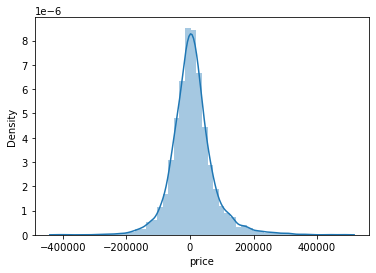

In [65]:
sns.distplot(y_test - y_pred)
plt.show()

#### Inference: As we can see here that the residual of the errors are normally distributed which also shows that the model is good fit model

### predicting the values and checking the distribution of residuals of RandomForest model

In [66]:
forest = RandomForestRegressor(random_state=42, n_estimators = 200)
forest.fit(x_train, y_train)
y_pred = np.exp(forest.predict(x_test))

In [67]:
np.sqrt(mean_squared_error(y_test, y_pred))

72619.14001572822

C:\Users\Alpha Wave\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


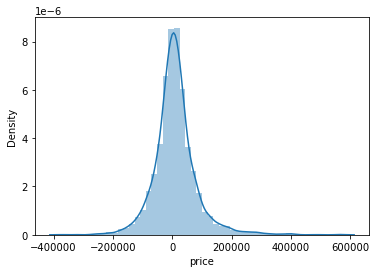

In [68]:
sns.distplot(y_test - y_pred)
plt.show()

## We can see here that both XGBoost and RandomForest regressors are giving 0.85+ R2 Score and the distribution of the residuals of both model is normally distributed which indicates the best fit model